In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dating = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")

In [5]:
dating.shape

(8378, 195)

In [6]:
dating.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
dating.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

It's a rather wide dataset with lots of columns given to us. The first important thing is to select only the related features for each different analysis purpose. Let's firstly do several analysis based on the filled in information on the survey, then explore more by different clusters of people or machine learning models.

### Firstly we would like to find are there any attributes' preference differences between the male and the female?

In [926]:
dating_pf = dating[['iid', 'gender', 'wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].drop_duplicates().set_index('iid')

In [927]:
dating_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 1 to 552
Data columns (total 8 columns):
gender      551 non-null int64
wave        551 non-null int64
attr1_1     544 non-null float64
sinc1_1     544 non-null float64
intel1_1    544 non-null float64
fun1_1      543 non-null float64
amb1_1      542 non-null float64
shar1_1     541 non-null float64
dtypes: float64(6), int64(2)
memory usage: 38.7 KB


In [928]:
dating_pf.describe()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,551.000000,551.000000,544.000000,544.000000,544.000000,543.000000,542.000000,541.000000
mean,0.502722,11.083485,22.685478,17.290754,20.170478,17.451363,10.806476,11.832126
std,0.500447,6.013947,12.971917,7.204724,6.878993,6.190985,6.229105,6.474104
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,15.000000,14.927500,17.292500,15.000000,5.000000,8.330000
50%,1.000000,11.000000,20.000000,18.000000,20.000000,18.000000,10.000000,11.000000
75%,1.000000,15.000000,25.000000,20.000000,23.020000,20.000000,15.000000,16.000000
max,1.000000,21.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000


From the info and describption above, there are NaN values for different attributes, but overall the values are in the 
range between 0 and 100. We will need to deal with NaN values later and try to rescale the attributes' values in certain rows to be total of 100 if not the case.

In [929]:
# check if there are still duplicate iids
len(dating_pf.index.unique()) == len(dating_pf.index)

True

In [930]:
## need to check attributes' values from wave 6 to 9 here since it's mentioned in the doc key that the scale method for
## this few waves are different from the other waves:
dating_pf[(dating_pf['wave'] >= 6) & (dating_pf['wave'] <= 9)].head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
132,0,6,16.67,16.67,16.67,16.67,16.67,16.67
133,0,6,12.77,19.15,17.02,17.02,14.89,19.15
134,0,6,6.67,20.00,20.00,17.78,20.00,15.56
135,0,6,18.18,22.73,18.18,13.64,13.64,13.64
136,0,6,NaN,NaN,NaN,NaN,NaN,NaN


In [931]:
## Actually even though for wave 6-9, the score scale is different, the original data for the certain waves is already 
## normalized to sum up to 100 as other waves
dating_pf.head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.0,20.0,20.0,15.0,15.0,15.0
2,0,1,45.0,5.0,25.0,20.0,0.0,5.0
3,0,1,35.0,10.0,35.0,10.0,10.0,0.0
4,0,1,20.0,20.0,20.0,20.0,10.0,10.0
5,0,1,20.0,5.0,25.0,25.0,10.0,15.0


In [932]:
pd.isnull(dating_pf).any(axis = 0)

gender      False
wave        False
attr1_1      True
sinc1_1      True
intel1_1     True
fun1_1       True
amb1_1       True
shar1_1      True
dtype: bool

In [933]:
# From the above results, we can see only the 6 attributes preferences having NA values here, we will first remove the 
# rows with NaN values for all 6 attributes:
boolean = pd.isnull(dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']]).all(axis = 1)
dating_pf = dating_pf[-boolean]

In [934]:
dating_pf.shape

(544, 8)

In [935]:
pd.isnull(dating_pf).any()

gender      False
wave        False
attr1_1     False
sinc1_1     False
intel1_1    False
fun1_1       True
amb1_1       True
shar1_1      True
dtype: bool

60.0 0.0
50.0 0.0
50.0 0.0


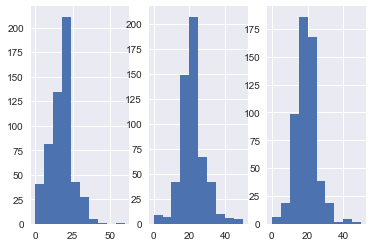

In [427]:
for i in range(3, 6):
    plt.subplot(1, 3, i - 2)
    plt.hist(dating_pf.iloc[:,i].dropna())
    print(max(dating_pf.iloc[:,i]), min(dating_pf.iloc[:,i]))

In [936]:
# From the histogram of the three attributes containing NA above, we can see that all the variables are not highly skewed which lead us 
# to replace the NA value safely with mean value:
dating_pf[['fun1_1', 'amb1_1','shar1_1']] = dating_pf[['gender', 'fun1_1', 'amb1_1','shar1_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean()))

In [938]:
# For cases the sum of all 6 attributes not equal to 100, we will normalize them to 100 here
dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']] = dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [939]:
dating_pf.head(5)

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.0,20.0,20.0,15.0,15.0,15.0
2,0,1,45.0,5.0,25.0,20.0,0.0,5.0
3,0,1,35.0,10.0,35.0,10.0,10.0,0.0
4,0,1,20.0,20.0,20.0,20.0,10.0,10.0
5,0,1,20.0,5.0,25.0,25.0,10.0,15.0


In [417]:
dating_pf.groupby('gender')['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
gender,,,,,,
0,18.021784,18.224015,20.976691,17.301115,12.820855,12.703246
1,27.225418,16.344473,19.365891,17.579307,8.749524,10.942784


Let's visualize the result by barplots then:

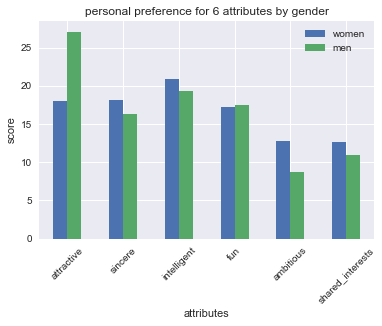

In [940]:
dating_pf.groupby('gender')['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean().T.plot(kind = 'bar',title = 'personal preference for 6 attributes by gender')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

From the result, we can see on average (at least from what are filled in the survey) men prefer attractiveness more than women, while women will compensate the 
outlook by ambitious, shared interests, sincerity and intelligence. It seems that women are more likely to date a well-rounded person than male. While fun seems to be equally important to both genders.

The top 3 valued attributes by male are: attractive, intelligent and fun

The top 3 valued attributes by female are: intelligent, attractive and sincere

The several analysis below follows similar analytical patterns with limited comments and explanation except the resulting part.


### What do you think of your fellow men/women look for in the opposite sex?

In [945]:
dating_fellow = dating[['iid', 'gender', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].drop_duplicates().set_index('iid')

In [946]:
dating_fellow.shape

(551, 7)

In [947]:
dating_fellow.tail()

,gender,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
iid,,,,,,,
548,1,60.0,0.0,0.0,20.0,0.0,20.0
549,1,50.0,10.0,5.0,20.0,5.0,10.0
550,1,30.0,3.0,30.0,30.0,3.0,4.0
551,1,25.0,5.0,20.0,20.0,15.0,15.0
552,1,90.0,0.0,0.0,0.0,0.0,10.0


In [948]:
# remove the rows with all attributes being NA
boolean = pd.isnull(dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1','shar4_1']]).all(axis = 1)
dating_fellow = dating_fellow[-boolean]

In [949]:
dating_fellow.shape

(417, 7)

In [950]:
pd.isnull(dating_fellow).any()

gender      False
attr4_1     False
sinc4_1     False
intel4_1    False
fun4_1      False
amb4_1      False
shar4_1      True
dtype: bool

(array([  24.,   92.,  160.,   66.,   12.,   49.,    8.,    4.,    0.,    1.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.]),
 <a list of 10 Patch objects>)

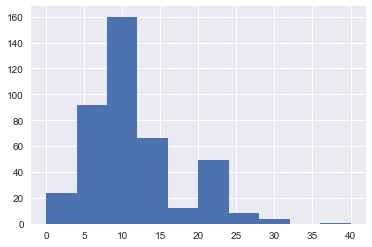

In [951]:
plt.hist(dating_fellow.iloc[:,6].dropna())

In [952]:
# Then impute the left NaN values to be the mean value for shar4_1 attribute within each gender group
dating_fellow[['shar4_1']] = (dating_fellow[['gender', 'shar4_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean())))

In [953]:
# due to the scale difference, we should also normalize the row to sum to 100 
dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']] = dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [954]:
dating_fellow.head()

,gender,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
iid,,,,,,,
132,0,23.26,16.28,16.28,16.28,11.63,16.28
133,0,17.07,17.07,17.07,17.07,14.63,17.07
134,0,13.64,20.45,20.45,15.91,15.91,13.64
135,0,16.33,16.33,16.33,18.37,18.37,14.29
137,1,21.95,14.63,12.20,19.51,12.20,19.51


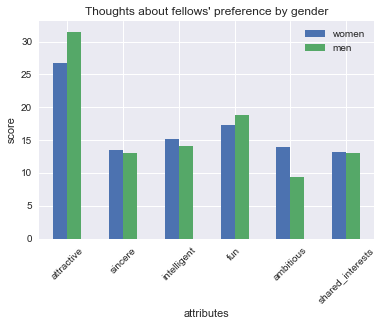

In [955]:
dating_fellow.groupby('gender')['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'].mean().T.plot(kind = 'bar', title = r"Thoughts about fellows' preference by gender")
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

The interesting find of this plot compared to the first plot is that people seem to natively think of their fellow to value attractiveness much more the other attributes, even for women who are said to prefer attractiveness less than men are considered to value the outlook way more important than other attributes like sincere, intelligence by their fellow.

### What do you think the opposite sex looks for in a date?

In [974]:
dating_opp = dating[['iid', 'gender', 'wave', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].drop_duplicates().set_index('iid')

In [975]:
dating_opp.head()

,gender,wave,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
iid,,,,,,,,
1,0,1,35.0,20.0,15.0,20.0,5.0,5.0
2,0,1,65.0,0.0,10.0,25.0,0.0,0.0
3,0,1,50.0,0.0,20.0,30.0,0.0,0.0
4,0,1,30.0,10.0,15.0,30.0,5.0,10.0
5,0,1,50.0,10.0,10.0,20.0,5.0,5.0


In [976]:
dating_opp.shape

(551, 8)

In [977]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1','shar2_1']]).all(axis = 1)
dating_opp = dating_opp[-boolean]

In [978]:
dating_opp.shape

(544, 8)

In [979]:
pd.isnull(dating_opp).any()

gender      False
wave        False
attr2_1     False
sinc2_1     False
intel2_1    False
fun2_1      False
amb2_1       True
shar2_1      True
dtype: bool

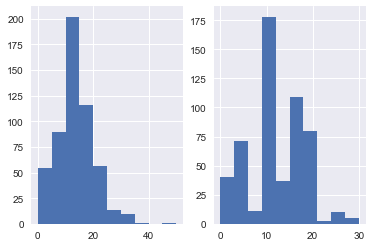

In [980]:
for i in range(6, 8):
    plt.subplot(1, 2, i - 5)
    plt.hist(dating_opp.iloc[:,i].dropna())

In [981]:
# Then impute the left NaN values to be the mean value for each attribute within each gender group
dating_opp[['amb2_1','shar2_1']] = (dating_opp[['gender', 'amb2_1','shar2_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean())))

In [982]:
dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']] = dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [983]:
dating_opp.shape

(544, 8)

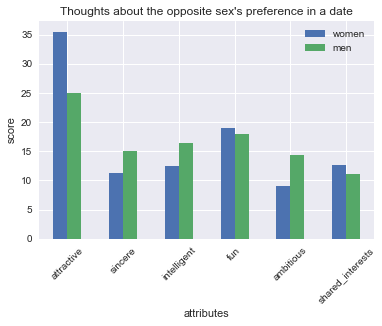

In [984]:
dating_opp.groupby('gender')['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'].mean().T.plot(kind = 'bar', title = r"Thoughts about the opposite sex's preference in a date")
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

The comparison results between men and women are quite aligned to the first finding for personal preference, however the absolute scores for each attributes differ from the first one in that attractiveness keep getting overvalued here, while other attributes like intelligence and sincerity are overlooked. Generally speaking, people would like to speak higher of sincere or intelligence score when asked about their own preference, but when asked about their thoughts about fellow or opposite sex's preference, they believe the outlook is valued more...

### How do you measure up yourself?

In [985]:
dating_measure = dating[['iid', 'gender', 'wave', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].drop_duplicates().set_index('iid')

In [986]:
dating_measure.head()

,gender,wave,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
iid,,,,,,,
1,0,1,6.0,8.0,8.0,8.0,7.0
2,0,1,7.0,5.0,8.0,10.0,3.0
3,0,1,8.0,9.0,9.0,8.0,8.0
4,0,1,7.0,8.0,7.0,9.0,8.0
5,0,1,6.0,3.0,10.0,6.0,8.0


In [987]:
dating_measure.shape

(551, 7)

In [988]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_measure[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]).all(axis = 1)
dating_measure = dating_measure[-boolean]

In [989]:
dating_measure.shape

(542, 7)

In [990]:
pd.isnull(dating_measure).any()

gender      False
wave        False
attr3_1     False
sinc3_1     False
intel3_1    False
fun3_1      False
amb3_1      False
dtype: bool

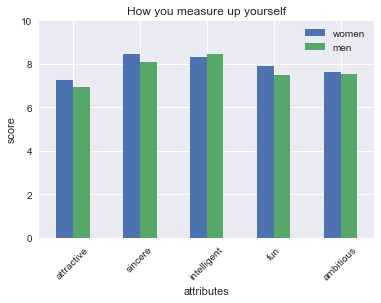

In [991]:
dating_measure.groupby('gender')['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'].mean().T.plot(kind = 'bar', ylim = [0, 10], title = 'How you measure up yourself')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(5), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious'), rotation = 45 )

From the measurement result, we do not see any significant difference among the attributes between two genders, however on average women seem to be more confident on all the attributes (attractive, sincere, fun and ambitious) except (intelligence).

### How do you think others perceive you?

In [992]:
dating_others = dating[['iid', 'gender', 'wave', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']].drop_duplicates().set_index('iid')

In [993]:
dating_others.tail()

,gender,wave,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
iid,,,,,,,
548,1,21,10.0,10.0,10.0,10.0,10.0
549,1,21,7.0,10.0,10.0,7.0,7.0
550,1,21,7.0,7.0,7.0,7.0,7.0
551,1,21,7.0,9.0,9.0,2.0,4.0
552,1,21,9.0,7.0,10.0,5.0,9.0


In [994]:
dating_others.shape

(551, 7)

In [995]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_others[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]).all(axis = 1)
dating_others = dating_others[-boolean]

In [996]:
dating_others.shape

(314, 7)

In [997]:
pd.isnull(dating_others).any()

gender      False
wave        False
attr5_1     False
sinc5_1     False
intel5_1    False
fun5_1      False
amb5_1      False
dtype: bool

In [998]:
dating_others.shape

(314, 7)

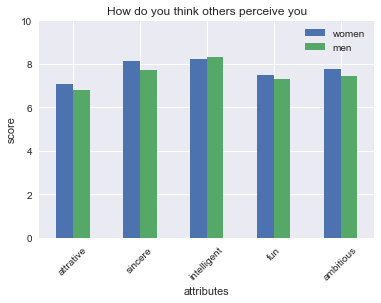

In [1000]:
dating_others.groupby('gender')['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'].mean().T.plot(kind = 'bar', ylim = [0, 10], title = 'How do you think others perceive you')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(5), ('attrative', 'sincere', 'intelligent', 'fun', 'ambitious'), rotation = 45 )

The average result is pretty close to the above result from 'how do you measure up yourself' which makes sense since people's measurement about themselves are also keeping effected by others. It results in the fact that most people would end up measuring them up by what most people perceive about them.

Next, let's cluster people by gender according to their attributes' value (measured by average score got from the opposite sex), then explore the match or decision rate between each cluster pairs:

### Clustering people based on their own features by gender, then calculate the one-sided decision rate or match rate for each cluster pair

In [1001]:
dating.shape

(8378, 195)

In [1002]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [1003]:
men_cluster = dating[dating['gender'] == 1]
women_cluster = dating[dating['gender'] == 0]

In [1004]:
men_cluster.shape, women_cluster.shape

((4194, 195), (4184, 195))

In [1005]:
men_cluster = men_cluster[['iid', 'attr_o', 'sinc_o', 
                          'intel_o', 'fun_o', 'amb_o']]

In [1006]:
men_cluster.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
100,11,6.0,9.0,7.0,7.0,6.0
101,11,5.0,7.0,8.0,4.0,6.0
102,11,7.0,9.0,10.0,7.0,8.0
103,11,4.0,10.0,8.0,5.0,8.0
104,11,5.0,8.0,8.0,2.0,2.0


In [1007]:
pd.isnull(men_cluster).any()

iid        False
attr_o      True
sinc_o      True
intel_o     True
fun_o       True
amb_o       True
dtype: bool

In [1008]:
men_cluster[men_cluster.isnull().any(axis = 1)].head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
515,40,4.0,8.0,7.0,9.0,NaN
526,41,7.0,8.0,NaN,NaN,8.0
534,41,7.0,8.0,9.0,NaN,9.0
545,42,6.0,8.0,NaN,7.0,NaN
564,43,7.0,8.0,8.0,8.0,NaN


In [1009]:
# directly calculate the mean of each attribute for each person ignoring the NaN value
men_cluster = men_cluster.groupby('iid').agg(np.mean)

In [1010]:
men_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 11 to 552
Data columns (total 5 columns):
attr_o     277 non-null float64
sinc_o     277 non-null float64
intel_o    277 non-null float64
fun_o      277 non-null float64
amb_o      277 non-null float64
dtypes: float64(5)
memory usage: 13.0 KB


In [1011]:
men_cluster.head()
# pay attention to the difference between normalization and standardization, here for our kmeans or hierarchy case, we 
# should do standardization for each 5 attribute

,attr_o,sinc_o,intel_o,fun_o,amb_o
iid,,,,,
11,5.6,8.8,8.2,5.4,6.4
12,7.1,6.6,7.1,6.7,6.9
13,4.8,7.9,8.8,7.0,5.9
14,8.2,7.6,7.4,7.6,6.6
15,5.7,7.6,7.7,7.2,6.5


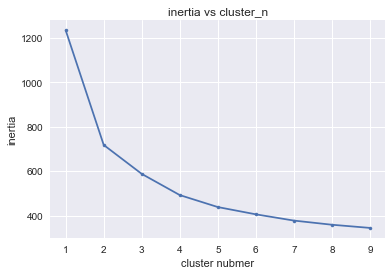

In [1012]:
from sklearn.cluster import KMeans
clusterNumber = np.arange(1, 10)
inertia_men = np.empty(len(clusterNumber))
for i, number in enumerate(clusterNumber):
    model = KMeans(n_clusters = number, random_state= 42)
    model.fit(men_cluster)
    inertia_men[i] = model.inertia_
plt.plot(clusterNumber, inertia_men,  marker = '.')
plt.title('inertia vs cluster_n')
plt.xlabel('cluster nubmer')
plt.ylabel('inertia')
plt.show()

Text(0.5,1,"Men' sttributes centroids for 4 clusters")

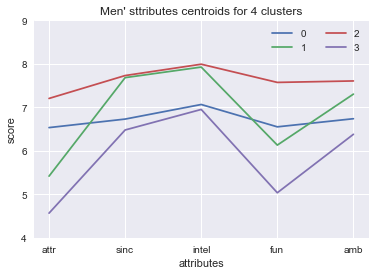

In [1013]:
# from the above result, I would like to make the cluster number for men to be 4
men_model = KMeans(n_clusters = 4, random_state = 42)
men_model.fit(men_cluster)
men_centroids = men_model.cluster_centers_
for i in range(4):
    plt.plot(np.arange(5), men_centroids[i])
plt.xlabel('attributes')
plt.xticks(np.arange(5), ['attr', 'sinc', 'intel', 'fun', 'amb'])
plt.ylabel('score')
plt.ylim([4, 9])
plt.legend(np.arange(4), loc = 'upper right', ncol= 2)
plt.title(r"Men' sttributes centroids for 4 clusters")

In [1014]:
# from the above four groups, we can define them separately as: all sided, good looking, average looking and low status
all_sided_m = men_cluster[men_model.labels_ == 2]
print(all_sided_m.head())
good_looking_m = men_cluster[men_model.labels_ == 0]
print(good_looking_m.head())
average_looking_m = men_cluster[men_model.labels_ == 1]
print(average_looking_m.head())
low_status_m = men_cluster[men_model.labels_ == 3]
print(low_status_m.head())

     attr_o    sinc_o   intel_o  fun_o     amb_o
iid                                             
14      8.2  7.600000  7.400000    7.6  6.600000
19      7.7  6.800000  7.700000    8.5  7.100000
20      7.5  7.300000  7.900000    8.2  8.400000
69      7.3  7.600000  7.900000    7.1  7.111111
70      6.0  7.444444  8.555556    8.0  8.444444
       attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                  
12   7.100000  6.600000  7.100000  6.700000  6.900000
46   7.631579  6.789474  7.315789  6.777778  6.294118
48   6.736842  6.263158  5.894737  6.789474  5.631579
49   6.315789  7.055556  7.500000  6.973684  7.055556
50   6.315789  6.578947  7.388889  7.631579  7.666667
     attr_o  sinc_o  intel_o  fun_o  amb_o
iid                                       
11      5.6     8.8      8.2    5.4    6.4
13      4.8     7.9      8.8    7.0    5.9
15      5.7     7.6      7.7    7.2    6.5
16      5.6     8.4      7.6    4.4    6.0
17      6.7     7.6  

In [1015]:
women_cluster = women_cluster[['iid', 'attr_o', 'sinc_o', 
                          'intel_o', 'fun_o', 'amb_o']]


In [1016]:
women_cluster.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
0,1,6.0,8.0,8.0,8.0,8.0
1,1,7.0,8.0,10.0,7.0,7.0
2,1,10.0,10.0,10.0,10.0,10.0
3,1,7.0,8.0,9.0,8.0,9.0
4,1,8.0,7.0,9.0,6.0,9.0


In [1017]:
pd.isnull(women_cluster).any()

iid        False
attr_o      True
sinc_o      True
intel_o     True
fun_o       True
amb_o       True
dtype: bool

In [1018]:
women_cluster[women_cluster.isnull().any(axis = 1)].head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
24,3,6.0,10.0,8.0,6.0,NaN
74,8,9.0,9.0,8.0,9.0,NaN
95,10,NaN,8.0,7.0,7.0,7.0
210,21,5.0,8.0,8.0,NaN,NaN
223,22,NaN,5.0,6.0,5.0,6.0


In [1019]:
women_cluster = women_cluster.groupby('iid').agg(np.mean)
women_cluster.info()
women_cluster.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 1 to 530
Data columns (total 5 columns):
attr_o     274 non-null float64
sinc_o     274 non-null float64
intel_o    274 non-null float64
fun_o      274 non-null float64
amb_o      274 non-null float64
dtypes: float64(5)
memory usage: 12.8 KB


,attr_o,sinc_o,intel_o,fun_o,amb_o
iid,,,,,
1,6.7,7.4,8.0,7.2,8.000000
2,7.7,7.1,7.9,7.5,7.500000
3,6.5,7.1,7.3,6.2,7.111111
4,7.0,7.1,7.7,7.5,7.700000
5,5.3,7.7,7.6,7.2,7.800000


In [1020]:
women_cluster.shape

(274, 5)

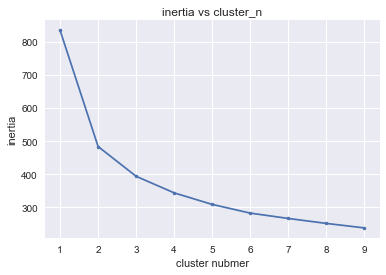

In [1021]:
clusterNumber = np.arange(1, 10)
inertia_women = np.empty(len(clusterNumber))
for i, number in enumerate(clusterNumber):
    model = KMeans(n_clusters = number)
    model.fit(women_cluster)
    inertia_women[i] = model.inertia_
plt.plot(clusterNumber, inertia_women,  marker = '.')
plt.title('inertia vs cluster_n')
plt.xlabel('cluster nubmer')
plt.ylabel('inertia')
plt.show()

Text(0.5,1,"Women' Attributes centroids for 4 clusters")

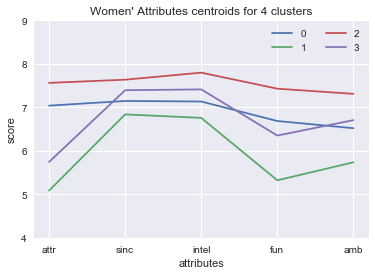

In [1022]:
# from the above result, I would like to make the cluster number for men to be 4
women_model = KMeans(n_clusters = 4, random_state = 42)
women_model.fit(women_cluster)
women_centroids = women_model.cluster_centers_
for i in range(4):
    plt.plot(np.arange(5), women_centroids[i])
plt.xlabel('attributes')
plt.xticks(np.arange(5), ['attr', 'sinc', 'intel', 'fun', 'amb'])
plt.ylabel('score')
plt.ylim([4, 9])
plt.legend(np.arange(4), loc = 'upper right', ncol= 2)
plt.title(r"Women' Attributes centroids for 4 clusters")

In [1023]:
# the clustering results are quite similar to the results for men, so here we also divide women as: all_sided, good looking,
# average looking and low status
all_sided_w = women_cluster[women_model.labels_ == 2]
print(all_sided_w.head())
good_looking_w = women_cluster[women_model.labels_ == 0]
print(good_looking_w.head())
average_looking_w = women_cluster[women_model.labels_ == 3]
print(average_looking_w.head())
low_status_w = women_cluster[women_model.labels_ == 1]
print(low_status_w.head())

     attr_o  sinc_o  intel_o  fun_o  amb_o
iid                                       
1       6.7     7.4      8.0    7.2    8.0
2       7.7     7.1      7.9    7.5    7.5
4       7.0     7.1      7.7    7.5    7.7
6       6.8     7.8      8.6    7.0    8.0
7       7.9     7.6      8.2    7.0    7.5
       attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                  
10   6.333333  7.000000  6.400000  6.400000  6.200000
24   6.500000  6.933333  7.333333  6.625000  6.714286
25   7.687500  7.266667  6.933333  7.333333  6.000000
26   7.625000  7.133333  7.266667  7.466667  6.500000
28   6.625000  7.437500  7.250000  6.375000  6.625000
     attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                
3    6.5000  7.100000  7.300000  6.200000  7.111111
5    5.3000  7.700000  7.600000  7.200000  7.800000
21   5.0625  7.312500  7.750000  5.666667  6.666667
23   5.9375  7.266667  6.937500  6.250000  6.400000
29   5.75

In [1024]:
## Here we will calculate the match or decision rate between each group within each gender
men_side = [all_sided_m, good_looking_m, average_looking_m, low_status_m]
women_side = [all_sided_w, good_looking_w, average_looking_w, low_status_w]
match_rate = np.zeros((4, 4))
men_dec = np.zeros((4, 4))
women_dec = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        result = dating.merge(men_side[i], left_on = 'iid', right_index = True).merge(women_side[j], left_on = 'pid', right_index = True)[['match', 'dec', 'dec_o']] 
        match_rate[i, j] = sum(result['match']) / len(result['match'])
        men_dec[i, j] = sum(result['dec']) / len(result['dec'])
        women_dec[j, i] = sum(result['dec_o']) / len(result['dec_o'])

In [1025]:
print(match_rate)
print(men_dec)
print(women_dec)

[[ 0.42145594  0.28482972  0.17131474  0.06321839]
 [ 0.32644628  0.22289157  0.13946588  0.03255814]
 [ 0.19130435  0.14473684  0.13963964  0.1183432 ]
 [ 0.09795918  0.05952381  0.07536232  0.09090909]]
[[ 0.65517241  0.51393189  0.25896414  0.1091954 ]
 [ 0.66528926  0.54216867  0.26706231  0.13023256]
 [ 0.70869565  0.625       0.47747748  0.38461538]
 [ 0.74285714  0.60714286  0.40869565  0.27777778]]
[[ 0.6091954   0.44628099  0.29130435  0.13469388]
 [ 0.51393189  0.36445783  0.20394737  0.08630952]
 [ 0.64940239  0.49851632  0.30630631  0.22608696]
 [ 0.60344828  0.45116279  0.32544379  0.25252525]]


In [1026]:
#correlation between those attributes
print(men_cluster.corr())
print(women_cluster.corr())

           attr_o    sinc_o   intel_o     fun_o     amb_o
attr_o   1.000000  0.305299  0.279350  0.718045  0.323098
sinc_o   0.305299  1.000000  0.687746  0.373396  0.418470
intel_o  0.279350  0.687746  1.000000  0.374089  0.656451
fun_o    0.718045  0.373396  0.374089  1.000000  0.450813
amb_o    0.323098  0.418470  0.656451  0.450813  1.000000
           attr_o    sinc_o   intel_o     fun_o     amb_o
attr_o   1.000000  0.264840  0.372222  0.648896  0.495067
sinc_o   0.264840  1.000000  0.643742  0.370305  0.341931
intel_o  0.372222  0.643742  1.000000  0.394013  0.636671
fun_o    0.648896  0.370305  0.394013  1.000000  0.578336
amb_o    0.495067  0.341931  0.636671  0.578336  1.000000


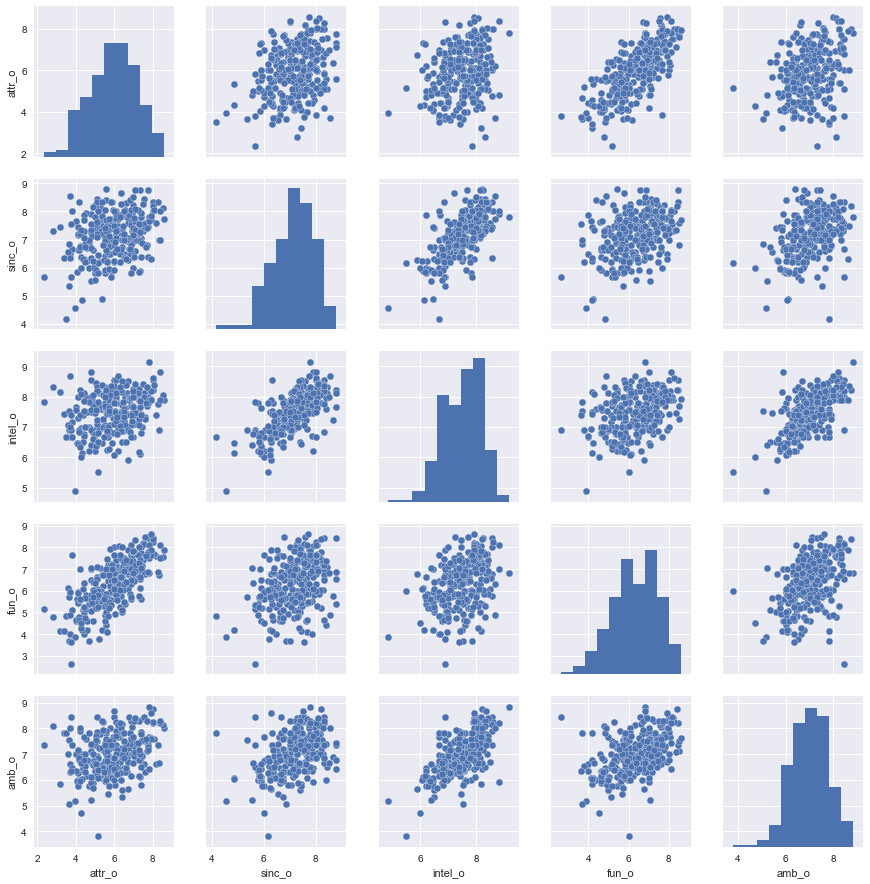

In [1027]:
sns.pairplot(men_cluster, size=2.5)

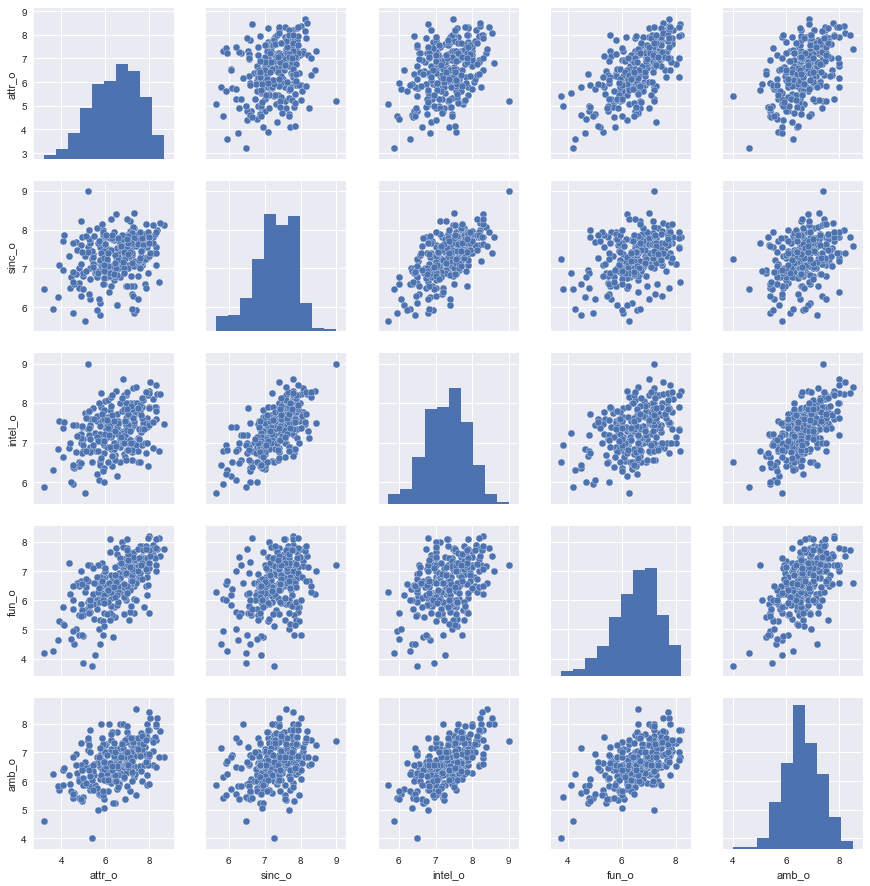

In [259]:
sns.pairplot(women_cluster, size=2.5)

From the attributes' correlation pairplots for both men and women, we can see that the results are similar to each other. Attractiveness and fun are strongly correlated, while intelligence are strongly correlated with fun and ambitious while ambitious and fun are not strongly related to each other. The results are aligned with our previous analysis referred to the cluster plots above. Attractiveness and fun are more external attributes while the other three are internal ones. It seems the score for fun and attractiveness can be affected each other, a funny person can be seen as more attractive, while a more attractive person can also be scored higher for the fun attribute. Some similar result applies for sinc/intel/amb attributes as well. Let's take a look at their own variance:

In [96]:
print(men_cluster.var())
print(women_cluster.var())

attr_o     1.493908
sinc_o     0.634789
intel_o    0.440148
fun_o      1.278153
amb_o      0.624841
dtype: float64
attr_o     1.171426
sinc_o     0.305520
intel_o    0.321507
fun_o      0.755404
amb_o      0.503371
dtype: float64


The resulting variance for attractive and fun are much larger than the other three attributes. It seems that attractiveness and fun can be easily scored or detected in a short time during speed dating event, while sincerity/intelligence/ambitiousness need more time to be evaluated which leads to less variance across these three attributes. The pattern for men and women are pretty similar.

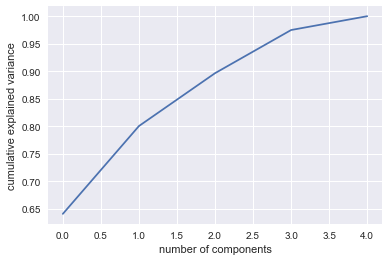

In [104]:
#PCA analysis
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
pca = PCA().fit(women_cluster)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

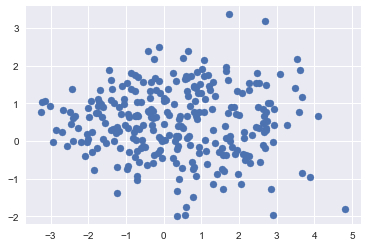

In [106]:
pca = PCA(n_components=2)
pca.fit(women_cluster)
X_pca = pca.transform(men_cluster)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.axis('equal');

In [108]:
print(pca.components_)

[[-0.6984743  -0.18371931 -0.2412969  -0.53081772 -0.37200702]
 [-0.58173518  0.44871339  0.50792388  0.0676959   0.44460215]]


It seems there is not very interesting finding from the PCA part. Let's move to some machine learning models to 
predict the match or decision rate.

## Machine learning part

#### We will first investigate the attributes' influence on their decision by each gender

In [560]:
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None

In [798]:
## using domain knowledge about partner selection, the attributes from the original dataset below are selected 
model_data = dating[['iid','gender','pid','samerace','int_corr', 'match', 'age',
             'race','attr','sinc','intel','fun','amb', 'dec', 'dec_o', 'from', 'field_cd']].merge(
    dating[['iid', 'pid', 'age', 'attr', 'sinc', 'intel', 'fun', 'amb', 'race', 'from', 'field_cd']], 
                                         left_on = ['pid', 'iid'], right_on = ['iid', 'pid'])

In [799]:
model_data.shape

(8368, 28)

In [800]:
model_data.head()

,iid_x,gender,pid_x,samerace,int_corr,match,age_x,race_x,attr_x,sinc_x,intel_x,fun_x,amb_x,dec,dec_o,from_x,field_cd_x,iid_y,pid_y,age_y,attr_y,sinc_y,intel_y,fun_y,amb_y,race_y,from_y,field_cd_y
0,1,0,11,0,0.14,0,21.0,4.0,6.0,9.0,7.0,7.0,6.0,1,0,Chicago,1.0,11,1,27.0,6.0,8.0,8.0,8.0,8.0,2.0,Argentina,8.0
1,1,0,12,0,0.54,0,21.0,4.0,7.0,8.0,7.0,8.0,5.0,1,0,Chicago,1.0,12,1,22.0,7.0,8.0,10.0,7.0,7.0,2.0,England,1.0
2,1,0,13,1,0.16,1,21.0,4.0,5.0,8.0,9.0,8.0,5.0,1,1,Chicago,1.0,13,1,22.0,10.0,10.0,10.0,10.0,10.0,4.0,Southern California,1.0
3,1,0,14,0,0.61,1,21.0,4.0,7.0,6.0,8.0,7.0,6.0,1,1,Chicago,1.0,14,1,23.0,7.0,8.0,9.0,8.0,9.0,2.0,"Cincinnati, Ohio",1.0
4,1,0,15,0,0.21,1,21.0,4.0,5.0,6.0,7.0,7.0,6.0,1,1,Chicago,1.0,15,1,24.0,8.0,7.0,9.0,6.0,9.0,3.0,Miami,1.0


In [801]:
model_data.describe(include='all')

,iid_x,gender,pid_x,samerace,int_corr,match,age_x,race_x,attr_x,sinc_x,intel_x,fun_x,amb_x,dec,dec_o,from_x,field_cd_x,iid_y,pid_y,age_y,attr_y,sinc_y,intel_y,fun_y,amb_y,race_y,from_y,field_cd_y
count,8368.0,8368.00000,8368.0,8368.000000,8210.000000,8368.000000,8274.000000,8305.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,8368.000000,8368.000000,8289,8286.000000,8368.0,8368.0,8274.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,8305.000000,8289,8286.000000
unique,551.0,NaN,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269,NaN,551.0,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269,NaN
top,552.0,NaN,552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,552.0,552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN
freq,22.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN
mean,NaN,0.50000,NaN,0.396272,0.196300,0.164914,26.364999,2.756653,6.190350,7.175256,7.369301,6.400474,6.778409,0.420053,0.420053,NaN,7.665339,NaN,NaN,26.364999,6.190350,7.175256,7.369301,6.400474,6.778409,2.756653,NaN,7.665339
std,NaN,0.50003,NaN,0.489151,0.303522,0.371125,3.563648,1.230689,1.950178,1.740575,1.550501,1.953816,1.794080,0.493597,0.493597,NaN,3.759695,NaN,NaN,3.563648,1.950178,1.740575,1.550501,1.953816,1.794080,1.230689,NaN,3.759695
min,NaN,0.00000,NaN,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000
25%,NaN,0.00000,NaN,0.000000,-0.010000,0.000000,24.000000,2.000000,5.000000,6.000000,6.000000,5.000000,6.000000,0.000000,0.000000,NaN,5.000000,NaN,NaN,24.000000,5.000000,6.000000,6.000000,5.000000,6.000000,2.000000,NaN,5.000000
50%,NaN,0.50000,NaN,0.000000,0.210000,0.000000,26.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,NaN,8.000000,NaN,NaN,26.000000,6.000000,7.000000,7.000000,7.000000,7.000000,2.000000,NaN,8.000000
75%,NaN,1.00000,NaN,1.000000,0.430000,0.000000,28.000000,4.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000,NaN,10.000000,NaN,NaN,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,4.000000,NaN,10.000000


In [802]:
features = model_data.loc[model_data.gender == 0, ['samerace', 'int_corr', 'age_x', 'race_x', 'attr_x', 'sinc_x', 'intel_x',
                                              'fun_x', 'amb_x', 'age_y', 'attr_y', 'sinc_y', 'intel_y', 'fun_y',
                                              'amb_y', 'race_y', 'from_x', 'from_y', 'field_cd_x', 'field_cd_y']]
men_dec = model_data.loc[model_data.gender == 0, 'dec']
women_dec = model_data.loc[model_data.gender == 0, 'dec_o']
match = model_data.loc[model_data.gender == 0, 'match']

In [803]:
features.shape, men_dec.shape, women_dec.shape, match.shape

((4184, 20), (4184,), (4184,), (4184,))

### Data wrangling part

In [804]:
pd.isnull(features).any()

samerace      False
int_corr       True
age_x          True
race_x         True
attr_x         True
sinc_x         True
intel_x        True
fun_x          True
amb_x          True
age_y          True
attr_y         True
sinc_y         True
intel_y        True
fun_y          True
amb_y          True
race_y         True
from_x         True
from_y         True
field_cd_x     True
field_cd_y     True
dtype: bool

(array([   3.,   51.,  194.,  401.,  582.,  834.,  814.,  762.,  385.,   79.]),
 array([-0.83 , -0.656, -0.482, -0.308, -0.134,  0.04 ,  0.214,  0.388,
         0.562,  0.736,  0.91 ]),
 <a list of 10 Patch objects>)

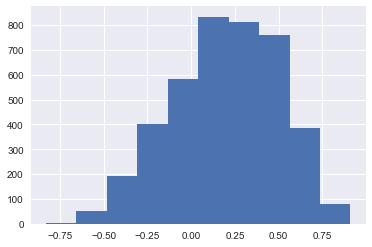

In [805]:
features.int_corr.isnull().sum()
plt.hist(features.int_corr.dropna())

In [806]:
features.age_x.describe(), features.age_y.describe()

(count    4119.000000
 mean       26.105851
 std         3.683108
 min        19.000000
 25%        23.000000
 50%        26.000000
 75%        28.000000
 max        55.000000
 Name: age_x, dtype: float64, count    4155.000000
 mean       26.621901
 std         3.422257
 min        18.000000
 25%        24.000000
 50%        27.000000
 75%        29.000000
 max        42.000000
 Name: age_y, dtype: float64)

In [807]:
## feature engineering part, for age and the involved 5 attributes, the difference between two 
## partners will play an important role instead of the absolute value for each attribute
features['age_diff'] = features['age_x'] - features['age_y']
features['attr_diff'] = features['attr_y'] - features['attr_x']
features['sinc_diff'] = features['sinc_y'] - features['sinc_x']
features['intel_diff'] = features['intel_y'] - features['intel_x']
features['fun_diff'] = features['fun_y'] - features['fun_x']
features['amb_diff'] = features['amb_y'] - features['amb_x']

In [808]:
features.race_y.unique()

array([  2.,   4.,   3.,   1.,   6.,  nan])

In [809]:
features.race_x.value_counts(), features.race_y.value_counts()

(2.0    2207
 4.0    1045
 3.0     403
 6.0     245
 1.0     241
 Name: race_x, dtype: int64, 2.0    2515
 4.0     933
 6.0     276
 3.0     261
 1.0     179
 Name: race_y, dtype: int64)

In [810]:
print("what are total decision rate for each race ")
pd.crosstab(features.race_y, men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

what are total decision rate for each race 


dec,0,1
race_y,,
1.0,0.63,0.37
2.0,0.59,0.41
3.0,0.64,0.36
4.0,0.74,0.26
6.0,0.68,0.32


In [811]:
print("what are the cross selections from the different races ")
pd.crosstab([features.race_x,features.race_y],men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

what are the cross selections from the different races 


dec               0     1
race_x race_y            
1.0    1.0     0.11  0.89
       2.0     0.52  0.48
       3.0     0.38  0.62
       4.0     0.66  0.34
       6.0     0.46  0.54
2.0    1.0     0.73  0.27
       2.0     0.62  0.38
       3.0     0.73  0.27
       4.0     0.82  0.18
       6.0     0.75  0.25
3.0    1.0     0.58  0.42
       2.0     0.60  0.40
       3.0     0.50  0.50
       4.0     0.75  0.25
       6.0     0.62  0.38
4.0    1.0     0.58  0.42
       2.0     0.56  0.44
       3.0     0.61  0.39
       4.0     0.59  0.41
       6.0     0.64  0.36
6.0    1.0     0.56  0.44
       2.0     0.58  0.42
       3.0     0.47  0.53
       4.0     0.73  0.27
       6.0     0.62  0.38

In [812]:
print("if the partner are from the same race are more keen to go for a date?")
pd.crosstab(features.samerace,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

if the partner are from the same race are more keen to go for a date?


dec,0,1
samerace,,
0,0.65,0.35
1,0.61,0.39


The difference between decision rate for men considering if the two are same race is not much, it seems that men do not care too much about that. But from the crosstable results between races we can find some distinguish parttern for decision rate considering different race combination, so we will include both samerace and races from each part these three variables into the final model

In [814]:
features['same_place'] = features['from_x'] == features['from_y']
print(sum(features['same_place']))

39


In [642]:
pd.crosstab(features.same_place,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

dec,0,1
same_place,,
False,0.63,0.37
True,0.62,0.38


The above results show that there are only 39 pairs from the same place, the input location should be errors or synonyms inside, let's take a look and try to corret most of them in a convenient way:

In [854]:
features.from_x.value_counts().head(30)

New York               554
California             328
New Jersey             254
China                  114
Taiwan                  98
Pennsylvania            86
Texas                   84
Maryland                68
Washington, DC          46
Ohio                    46
Mexico                  43
Hong Kong               41
England                 38
Michigan                38
Boston                  38
Minnesota               34
Arizona                 32
Florida                 32
Connecticut             29
Chicago                 29
Buffalo, NY             28
India                   28
Indiana                 24
Southern California     24
Virginia                23
San Diego               22
Salt Lake City          22
Hawaii                  22
Kansas                  22
HKG                     22
Name: from_x, dtype: int64

In [823]:
# The above list contains the top 30 places where participants come from, we can clearly see that there are many synonyms or 
# at least similar places like 'New York', 'NYC', 'New York City' which should belong to the same category. Let's clean
# the data a little bit and assign similar places to one according to the top 30 places:
features.loc[features.from_x.isin(['NYC', 'New York City','Brooklyn, NY', 'Long Island']), 'from_x'] = 'New York'
features.loc[features.from_x == 'NJ','from_x'] = 'New Jersey'
features.loc[features.from_x.isin(['San Francisco', 'Northern California', 'Los Angeles']), 'from_x'] = 'California'
features.loc[features.from_x == 'PA', 'from_x'] = 'Pennsylvania'

In [853]:
features.from_y.value_counts().head(30)

New York            325
New Jersey          188
California          171
Italy               132
Boston              125
Spain                87
Israel               86
Philadelphia         82
Germany              80
India                79
France               76
Texas                75
Chicago              66
Russia               64
Miami                55
Greece               53
Washington, DC       41
Canada               40
Bangladesh           40
Connecticut          40
Maryland             37
Cincinnati, Ohio     34
Philippines          33
Los Angeles          31
Mexico               31
NJ                   30
Argentina            28
Washington DC        28
Long Island          27
Florida              27
Name: from_y, dtype: int64

In [824]:
features.loc[features.from_y.isin(['NYC', 'New York City','new york']), 'from_y'] = 'New York'
features.loc[features.from_y == 'Northern New Jersey','from_y'] = 'New Jersey'
features.loc[features.from_y.isin(['San Francisco', 'Los Angeles, CA']), 'from_y'] = 'California'
features.loc[features.from_y == 'Houston', 'from_y'] = 'Texas'
features.loc[features.from_y == 'Boston, MA', 'from_y'] = 'Boston'

In [825]:
features['same_place'] = features['from_x'] == features['from_y']
print(sum(features['same_place']))

77


In [910]:
pd.crosstab(features.same_place,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

dec,0,1
same_place,,
False,0.63,0.37
True,0.66,0.34


In [851]:
index_men = features.from_x.isin(['New York', 'California', 'New Jersey', 'China', 'Taiwan'])     

In [852]:
pd.crosstab(features.from_x[index_men],men_dec[index_men]).apply(lambda r: r/r.sum(), axis=1).round(2).sort_values([1], ascending=False)

dec,0,1
from_x,,
China,0.49,0.51
Taiwan,0.50,0.50
New York,0.64,0.36
New Jersey,0.65,0.35
California,0.70,0.30


In [855]:
index_women = features.from_y.isin(['New York', 'New Jersey', 'California', 'Italy', 'Boston'])

In [856]:
pd.crosstab(features.from_y[index_women],men_dec[index_women]).apply(lambda r: r/r.sum(), axis=1).round(2).sort_values([1], ascending=False)

dec,0,1
from_y,,
Italy,0.51,0.49
New York,0.59,0.41
Boston,0.62,0.38
New Jersey,0.65,0.35
California,0.68,0.32


The interesting find here is people from the same state/place seem to have a negative effect on the final decision. But we can see there is some significant difference between the decision rate given the place men or women come from , so we will also include these two variables in the final dataset. Let's go on exploring more about the effect of field of study on final decision:

In [827]:
features['same_field'] = features['field_cd_x'] == features['field_cd_y']
print(sum(features['same_field']))

480


In [841]:
pd.crosstab(features.same_field,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

dec,0,1
same_field,,
False,0.64,0.36
True,0.60,0.40


In [843]:
pd.crosstab(features.field_cd_x,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2).sort_values([1], ascending=False).head(10)

dec,0,1
field_cd_x,,
14.0,0.47,0.53
4.0,0.54,0.46
9.0,0.54,0.46
5.0,0.55,0.45
3.0,0.58,0.42
1.0,0.61,0.39
16.0,0.65,0.35
10.0,0.66,0.34
6.0,0.67,0.33


The similar find as the same_place feature, people seem to give more credit to the opposite with a different background. But field of study individually takes effect on the final decision.

In [857]:
features.head()

,samerace,int_corr,age_x,race_x,attr_x,sinc_x,intel_x,fun_x,amb_x,age_y,attr_y,sinc_y,intel_y,fun_y,amb_y,race_y,from_x,from_y,field_cd_x,field_cd_y,age_diff,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,same_place,same_field
0,0,0.14,21.0,4.0,6.0,9.0,7.0,7.0,6.0,27.0,6.0,8.0,8.0,8.0,8.0,2.0,Chicago,Argentina,1.0,8.0,-6.0,0.0,-1.0,1.0,1.0,2.0,False,False
1,0,0.54,21.0,4.0,7.0,8.0,7.0,8.0,5.0,22.0,7.0,8.0,10.0,7.0,7.0,2.0,Chicago,England,1.0,1.0,-1.0,0.0,0.0,3.0,-1.0,2.0,False,True
2,1,0.16,21.0,4.0,5.0,8.0,9.0,8.0,5.0,22.0,10.0,10.0,10.0,10.0,10.0,4.0,Chicago,Southern California,1.0,1.0,-1.0,5.0,2.0,1.0,2.0,5.0,False,True
3,0,0.61,21.0,4.0,7.0,6.0,8.0,7.0,6.0,23.0,7.0,8.0,9.0,8.0,9.0,2.0,Chicago,"Cincinnati, Ohio",1.0,1.0,-2.0,0.0,2.0,1.0,1.0,3.0,False,True
4,0,0.21,21.0,4.0,5.0,6.0,7.0,7.0,6.0,24.0,8.0,7.0,9.0,6.0,9.0,3.0,Chicago,Miami,1.0,1.0,-3.0,3.0,1.0,2.0,-1.0,3.0,False,True


Let's go beyond the attributes scores and look into more other available interesting features in the dataset. This time I would like to apply classification algorithm on it to predict match probability using lasso/random forest:

In [858]:
features=features.rename(columns = {'age_x':'age_men', 'race_x':'race_men', 'attr_x':'attr_women', 'sinc_x':'sinc_women',
                                   'intel_x':'intel_women', 'fun_x':'fun_women', 'amb_x':'amb_women', 'age_y':'age_women',
                                   'attr_y':'attr_men', 'sinc_y':'sinc_men', 'intel_y':'intel_men', 'fun_y':'fun_men',
                                   'amb_y':'amb_men', 'race_y':'race_women', 'field_cd_x':'field_men', 'field_cd_y':'field_women',
                                   'from_x':'from_men', 'from_y':'from_women'})

In [859]:
features.head()

,samerace,int_corr,age_men,race_men,attr_women,sinc_women,intel_women,fun_women,amb_women,age_women,attr_men,sinc_men,intel_men,fun_men,amb_men,race_women,from_men,from_women,field_men,field_women,age_diff,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,same_place,same_field
0,0,0.14,21.0,4.0,6.0,9.0,7.0,7.0,6.0,27.0,6.0,8.0,8.0,8.0,8.0,2.0,Chicago,Argentina,1.0,8.0,-6.0,0.0,-1.0,1.0,1.0,2.0,False,False
1,0,0.54,21.0,4.0,7.0,8.0,7.0,8.0,5.0,22.0,7.0,8.0,10.0,7.0,7.0,2.0,Chicago,England,1.0,1.0,-1.0,0.0,0.0,3.0,-1.0,2.0,False,True
2,1,0.16,21.0,4.0,5.0,8.0,9.0,8.0,5.0,22.0,10.0,10.0,10.0,10.0,10.0,4.0,Chicago,Southern California,1.0,1.0,-1.0,5.0,2.0,1.0,2.0,5.0,False,True
3,0,0.61,21.0,4.0,7.0,6.0,8.0,7.0,6.0,23.0,7.0,8.0,9.0,8.0,9.0,2.0,Chicago,"Cincinnati, Ohio",1.0,1.0,-2.0,0.0,2.0,1.0,1.0,3.0,False,True
4,0,0.21,21.0,4.0,5.0,6.0,7.0,7.0,6.0,24.0,8.0,7.0,9.0,6.0,9.0,3.0,Chicago,Miami,1.0,1.0,-3.0,3.0,1.0,2.0,-1.0,3.0,False,True


In [896]:
pd.isnull(features).any(axis = 0)

samerace       False
int_corr       False
age_men        False
race_men       False
attr_women     False
sinc_women     False
intel_women    False
fun_women      False
amb_women      False
age_women      False
attr_men       False
sinc_men       False
intel_men      False
fun_men        False
amb_men        False
race_women     False
from_men       False
from_women     False
field_men      False
field_women    False
age_diff       False
attr_diff      False
sinc_diff      False
intel_diff     False
fun_diff       False
amb_diff       False
same_place     False
same_field     False
dtype: bool

In [894]:
#features.race_men = features.race_men.fillna(features.race_men.mode())
#pd.isnull(features.race_men).sum()
features.fillna({'race_men':features.race_men.mode()[0], 'race_women':features.race_women.mode()[0],
                'from_men':features.from_men.mode()[0], 'from_women':features.from_women.mode()[0],
                'field_men':features.field_men.mode()[0], 'field_women':features.field_women.mode()[0]}, inplace=True)
features.fillna(features.mean(), inplace=True)

In [897]:
pd.isnull(match).any(), pd.isnull(men_dec).any(), pd.isnull(women_dec).any()

(False, False, False)

In [899]:
pd.isnull(features).any(axis = 0)

samerace       False
int_corr       False
age_men        False
race_men       False
attr_women     False
sinc_women     False
intel_women    False
fun_women      False
amb_women      False
age_women      False
attr_men       False
sinc_men       False
intel_men      False
fun_men        False
amb_men        False
race_women     False
from_men       False
from_women     False
field_men      False
field_women    False
age_diff       False
attr_diff      False
sinc_diff      False
intel_diff     False
fun_diff       False
amb_diff       False
same_place     False
same_field     False
dtype: bool

### Model for men's decision

In [900]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
features.from_men = lb.fit_transform(features.from_men.astype(str))
features.from_women = lb.fit_transform(features.from_women.astype(str))
features.race_men = lb.fit_transform(features.race_men)
features.race_women = lb.fit_transform(features.race_women)
features.field_men = lb.fit_transform(features.field_men)
features.field_women = lb.fit_transform(features.field_women)
trainM, testM, tar_trainM, tar_testM  =   train_test_split(features, men_dec, test_size=.3, random_state = 123)
forest_men = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_men.fit(trainM, tar_trainM)
print(forest_men.feature_importances_)
print(forest_men.oob_score_)
y_predicted_m = forest_men.predict_proba(testM)[:, 1]
predM = forest_men.predict(testM)
print(metrics.confusion_matrix(tar_testM, predM))
print(metrics.accuracy_score(tar_testM, predM))

[ 0.00942388  0.05213729  0.03612932  0.02408098  0.10952778  0.02910422
  0.03005459  0.08966052  0.02799933  0.03218607  0.02856308  0.02440313
  0.0231403   0.02750707  0.02626346  0.02074604  0.05184218  0.04787658
  0.03830852  0.02715852  0.0379452   0.0650687   0.02982588  0.02725205
  0.0453829   0.03120324  0.00180638  0.0054028 ]
0.759904371585
[[656 129]
 [185 286]]
0.75


In [902]:
sum(men_dec == 0) / len(men_dec)

0.6345602294455067

ROC AUC: 0.82


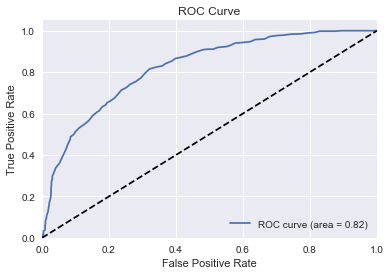

In [903]:
from sklearn.metrics import roc_curve, auc
 
fpr, tpr, _ = metrics.roc_curve(tar_testM, y_predicted_m)

roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Men')
plt.legend(loc="lower right")
plt.show()

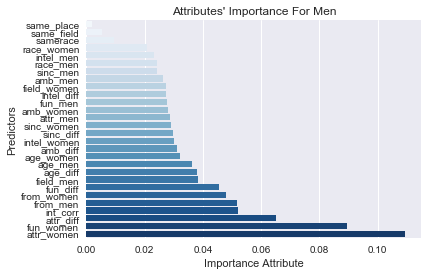

In [914]:
FeaturesImportanceM = sorted(zip(forest_men.feature_importances_,features.columns))
dfMale = pd.DataFrame(FeaturesImportanceM, columns=['model.feature_importances_', 'predictors.columns'])
ax1 = sns.barplot(y="predictors.columns", x="model.feature_importances_", data=dfMale,
             palette="Blues")
ax1.set(ylabel='Predictors', xlabel='Importance Attribute',title="Attributes' Importance For Men")
plt.show(ax1)

### Model for women's decision

In [912]:
trainW, testW, tar_trainW, tar_testW  =   train_test_split(features, women_dec, test_size=.3, random_state = 123)
forest_women = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_women.fit(trainW, tar_trainW)
print(forest_women.feature_importances_)
print(forest_women.oob_score_)
y_predicted_w = forest_women.predict_proba(testW)[:, 1]
predW = forest_women.predict(testW)
print(metrics.confusion_matrix(tar_testW, predW))
print(metrics.accuracy_score(tar_testW, predW))

[ 0.00751677  0.0492167   0.02964301  0.01554385  0.02556339  0.02575767
  0.02289227  0.02977306  0.0264208   0.03706168  0.15609161  0.02531957
  0.02929343  0.09150079  0.02973975  0.0166349   0.04388905  0.05113454
  0.02963839  0.02665827  0.03579458  0.06801206  0.02861953  0.0250357
  0.03986466  0.02671296  0.00087671  0.0057943 ]
0.762978142077
[[502 135]
 [180 439]]
0.749203821656


ROC AUC: 0.83


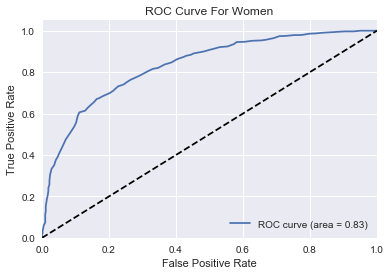

In [913]:
fpr, tpr, _ = metrics.roc_curve(tar_testW, y_predicted_w)

roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Women')
plt.legend(loc="lower right")
plt.show()

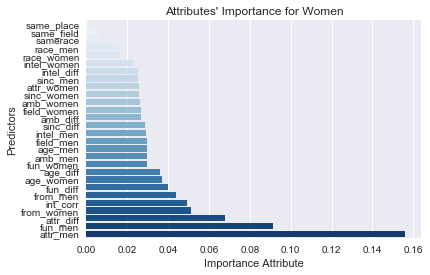

In [916]:
FeaturesImportanceW = sorted(zip(forest_women.feature_importances_,features.columns))
dfFemale = pd.DataFrame(FeaturesImportanceW, columns=['model.feature_importances_', 'predictors.columns'])
ax2 = sns.barplot(y="predictors.columns", x="model.feature_importances_", data=dfFemale,
             palette="Blues")
ax2.set(ylabel='Predictors', xlabel='Importance Attribute',title="Attributes' Importance for Women")
plt.show(ax2)

### Model for Match Rate

In [919]:
train_match, test_match, tar_train_match, tar_test_match  = train_test_split(features, match, test_size=.3, random_state = 123)
forest_match = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_match.fit(train_match, tar_train_match)
print(forest_match.feature_importances_)
print(forest_match.oob_score_)
y_predicted_match = forest_match.predict_proba(test_match)[:, 1]
pred_match = forest_match.predict(test_match)
print(metrics.confusion_matrix(tar_test_match, pred_match))
print(metrics.accuracy_score(tar_test_match, pred_match))

[ 0.00896212  0.05744952  0.04102758  0.02228607  0.05720647  0.03083144
  0.03012207  0.07653849  0.02785121  0.03575717  0.06518431  0.02579739
  0.02658003  0.05200053  0.02898088  0.01866259  0.05500622  0.05717489
  0.0362413   0.03036418  0.03909673  0.04254382  0.02918579  0.02749274
  0.03513494  0.0300749   0.00154954  0.01089709]
0.856898907104
[[1007   23]
 [ 184   42]]
0.835191082803


In [920]:
sum(match == 0) / len(match)

0.8350860420650096

ROC AUC: 0.81


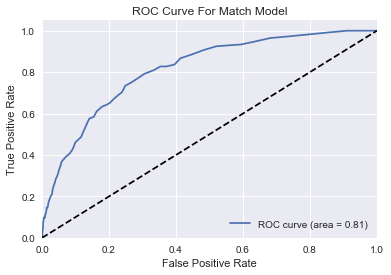

In [922]:
fpr, tpr, _ = metrics.roc_curve(tar_test_match, y_predicted_match)

roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Match Model')
plt.legend(loc="lower right")
plt.show()

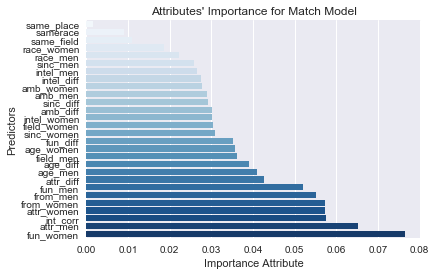

In [923]:
FeaturesImportance_Match = sorted(zip(forest_match.feature_importances_,features.columns))
dfMatch = pd.DataFrame(FeaturesImportance_Match, columns=['model.feature_importances_', 'predictors.columns'])
ax3 = sns.barplot(y="predictors.columns", x="model.feature_importances_", data=dfMatch,
             palette="Blues")
ax3.set(ylabel='Predictors', xlabel='Importance Attribute',title="Attributes' Importance for Match Model")
plt.show(ax3)